In [2]:
%matplotlib notebook

In [3]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy import stats
from scipy.stats import linregress

In [4]:
Jan = pd.read_csv("2018Data/RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("2018Data/RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("2018Data/RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("2018Data/RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("2018Data/RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("2018Data/RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("2018Data/RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("2018Data/RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("2018Data/RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("2018Data/RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("2018Data/RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("2018Data/RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly18_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [5]:
Jan2 = pd.read_csv("2017Data/RideShare_Data_201701.csv", parse_dates=[0], low_memory=False)
Feb2 = pd.read_csv("2017Data/RideShare_Data_201702.csv", parse_dates=[0], low_memory=False)
Mar2 = pd.read_csv("2017Data/RideShare_Data_201703.csv", parse_dates=[0], low_memory=False)
Apr2 = pd.read_csv("2017Data/RideShare_Data_201704.csv", parse_dates=[0], low_memory=False)
May2 = pd.read_csv("2017Data/RideShare_Data_201705.csv", parse_dates=[0], low_memory=False)
Jun2 = pd.read_csv("2017Data/RideShare_Data_201706.csv", parse_dates=[0], low_memory=False)
Jul2 = pd.read_csv("2017Data/RideShare_Data_201707.csv", parse_dates=[0], low_memory=False)
Aug2 = pd.read_csv("2017Data/RideShare_Data_201708.csv", parse_dates=[0], low_memory=False)
Sep2 = pd.read_csv("2017Data/RideShare_Data_201709.csv", parse_dates=[0], low_memory=False)
Oct2 = pd.read_csv("2017Data/RideShare_Data_201710.csv", parse_dates=[0], low_memory=False)
Nov2 = pd.read_csv("2017Data/RideShare_Data_201711.csv", parse_dates=[0], low_memory=False)
Dec2 = pd.read_csv("2017Data/RideShare_Data_201712.csv", parse_dates=[0], low_memory=False)
Yearly17_Data = pd.concat([Jan2, Feb2, Mar2, Apr2, May2, Jun2, Jul2, Aug2, Sep2, Oct2, Nov2, Dec2])
Yearly17_Data.head()

,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,0,2017-01-01 00:00:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720480.0,42,44.0,4.0,803.0,Clouds,broken clouds
1,1,2017-01-01 00:00:58,1970-01-01 00:00:00,166.0,0.0,0.0,"Morningside Heights, Manhattan",NaN,10024.0,NaN,-24720481.0,42,44.0,4.0,803.0,Clouds,broken clouds
2,2,2017-01-01 00:02:21,1970-01-01 00:00:00,239.0,0.0,0.0,"Upper West Side South, Manhattan",NaN,10024.0,NaN,-24720482.0,42,44.0,4.0,803.0,Clouds,broken clouds
3,3,2017-01-01 00:03:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720483.0,42,44.0,4.0,803.0,Clouds,broken clouds
4,4,2017-01-01 00:05:46,1970-01-01 00:00:00,36.0,0.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,-24720486.0,42,44.0,4.0,803.0,Clouds,broken clouds


In [6]:
#Yearly18_Data.head()
Yearly_Data = pd.concat([Yearly17_Data,Yearly18_Data])
Yearly_Data.head()

,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,0,2017-01-01 00:00:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720480.0,42,44.0,4.0,803.0,Clouds,broken clouds
1,1,2017-01-01 00:00:58,1970-01-01 00:00:00,166.0,0.0,0.0,"Morningside Heights, Manhattan",NaN,10024.0,NaN,-24720481.0,42,44.0,4.0,803.0,Clouds,broken clouds
2,2,2017-01-01 00:02:21,1970-01-01 00:00:00,239.0,0.0,0.0,"Upper West Side South, Manhattan",NaN,10024.0,NaN,-24720482.0,42,44.0,4.0,803.0,Clouds,broken clouds
3,3,2017-01-01 00:03:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-24720483.0,42,44.0,4.0,803.0,Clouds,broken clouds
4,4,2017-01-01 00:05:46,1970-01-01 00:00:00,36.0,0.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,-24720486.0,42,44.0,4.0,803.0,Clouds,broken clouds


In [7]:
Yearly_Data["Years"] = pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.year
Yearly_Data["Years"]

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
97503    2018
97504    2018
97505    2018
97506    2018
97507    2018
97508    2018
97509    2018
97510    2018
97511    2018
97512    2018
97513    2018
97514    2018
97515    2018
97516    2018
97517    2018
97518    2018
97519    2018
97520    2018
97521    2018
97522    2018
97523    2018
97524    2018
97525    2018
97526    2018
97527    2018
97528    2018
97529    2018
97530    2018
97531    2018
97532    2018
Name: Years, Length: 2090923, dtype: int64

In [16]:
Yearly_Data['Pickup_DateTime'] = Yearly_Data['Pickup_DateTime'].astype('datetime64[ns]')

Yearly_Data["hours"] =pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.hour
Yearly_Data["hours"]

Yearly_Data=Yearly_Data.assign(hours_group=pd.cut(Yearly_Data.Pickup_DateTime.dt.hour,
                           [-1,6,12,18,23],
                           labels=['Night','Morning','Afternoon','Evening'],
                           include_lowest=True))

In [17]:
Yearly_Data.head()

,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,...,humidity,wind_speed,weather_id,weather_main,weather_description,Years,month,month_name,hours,hours_group
0,0,2017-01-01 00:00:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,44.0,4.0,803.0,Clouds,broken clouds,2017,1,Jan,0,Night
1,1,2017-01-01 00:00:58,1970-01-01 00:00:00,166.0,0.0,0.0,"Morningside Heights, Manhattan",NaN,10024.0,NaN,...,44.0,4.0,803.0,Clouds,broken clouds,2017,1,Jan,0,Night
2,2,2017-01-01 00:02:21,1970-01-01 00:00:00,239.0,0.0,0.0,"Upper West Side South, Manhattan",NaN,10024.0,NaN,...,44.0,4.0,803.0,Clouds,broken clouds,2017,1,Jan,0,Night
3,3,2017-01-01 00:03:00,1970-01-01 00:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,44.0,4.0,803.0,Clouds,broken clouds,2017,1,Jan,0,Night
4,4,2017-01-01 00:05:46,1970-01-01 00:00:00,36.0,0.0,0.0,"Bushwick North, Brooklyn",NaN,11216.0,NaN,...,44.0,4.0,803.0,Clouds,broken clouds,2017,1,Jan,0,Night


In [18]:
Yearly_Data["month"] =pd.to_datetime(Yearly_Data["Pickup_DateTime"]).dt.month



In [19]:
def fmonthofyear(x):
    return {
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
     }.get(x, "NA")




Yearly_Data["month_name"]= Yearly_Data["month"].apply(fmonthofyear)
Yearly_Data["month_name"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [22]:
month_group = Yearly_Data.groupby(['Years','month','hours_group']).size().reset_index(name='count') 
month_group 

month_df = Yearly_Data.groupby(Yearly_Data["month"])["Trip_Duration"].mean().reset_index(name='mean') 
month_df.dtypes 
month_group 
#Yearly_Data.groupby(['Years','month','hours_group']).count()
#month_df

,Years,month,hours_group,count
0,2017,1,Night,13248
1,2017,1,Morning,22446
2,2017,1,Afternoon,25988
3,2017,1,Evening,23103
4,2017,2,Night,12747
5,2017,2,Morning,22111
6,2017,2,Afternoon,24289
7,2017,2,Evening,23413
8,2017,3,Night,14715
9,2017,3,Morning,26540


In [23]:
pv_table = pd.pivot_table(month_group, values='count', index=['Years','month'],
                    columns=['hours_group'], aggfunc=np.sum)
pv_table


hours_group  Night  Morning  Afternoon  Evening
Years month                                    
2017  1      13248    22446      25988    23103
      2      12747    22111      24289    23413
      3      14715    26540      28505    27792
      4      15289    24648      26807    25343
      5      15401    26241      28272    25824
      6      12844    18552      21952    21261
      7      13177    18886      22744    22213
      8      12340    19952      23607    22736
      9      12872    20099      24816    24240
      10     14325    22355      26938    25934
      11     13738    22848      27739    26503
      12     15590    24358      30887    29689
2018  1      11687    19210      23691    21227
      2      10646    18863      23237    21745
      3      12870    22535      26186    24687
      4      12554    21977      25286    23963
      5      12751    21987      26683    24136
      6      13601    21601      25529    23820
      7      13857    22181      27211    24902
      8      13956    23319      27292    25284
      9      14006    22911      27906    25407
      10     14458    24864      28688    27175
      11     14024    23773      28783    27004
      12     15379    23357      30183    28614

In [24]:
pv_table.columns

CategoricalIndex(['Night', 'Morning', 'Afternoon', 'Evening'], categories=['Night', 'Morning', 'Afternoon', 'Evening'], ordered=True, name='hours_group', dtype='category')

In [25]:
pv_table.columns = pd.Index(list(pv_table.columns))
pv_table

Night  Morning  Afternoon  Evening
Years month                                    
2017  1      13248    22446      25988    23103
      2      12747    22111      24289    23413
      3      14715    26540      28505    27792
      4      15289    24648      26807    25343
      5      15401    26241      28272    25824
      6      12844    18552      21952    21261
      7      13177    18886      22744    22213
      8      12340    19952      23607    22736
      9      12872    20099      24816    24240
      10     14325    22355      26938    25934
      11     13738    22848      27739    26503
      12     15590    24358      30887    29689
2018  1      11687    19210      23691    21227
      2      10646    18863      23237    21745
      3      12870    22535      26186    24687
      4      12554    21977      25286    23963
      5      12751    21987      26683    24136
      6      13601    21601      25529    23820
      7      13857    22181      27211    24902
      8      13956    23319      27292    25284
      9      14006    22911      27906    25407
      10     14458    24864      28688    27175
      11     14024    23773      28783    27004
      12     15379    23357      30183    28614

In [26]:
pv_table = pv_table.reset_index()

In [27]:
pv_table

,Years,month,Night,Morning,Afternoon,Evening
0,2017,1,13248,22446,25988,23103
1,2017,2,12747,22111,24289,23413
2,2017,3,14715,26540,28505,27792
3,2017,4,15289,24648,26807,25343
4,2017,5,15401,26241,28272,25824
5,2017,6,12844,18552,21952,21261
6,2017,7,13177,18886,22744,22213
7,2017,8,12340,19952,23607,22736
8,2017,9,12872,20099,24816,24240
9,2017,10,14325,22355,26938,25934


In [28]:
pv_table["Year_month"] = pv_table["Years"] + round((pv_table["month"]/12),2)
pv_table
pv_table["Total"] = pv_table["Night"] + pv_table["Morning"]+pv_table["Afternoon"]+pv_table["Evening"]
pv_table
pv_table["Night_Rate"] = (pv_table["Night"]/pv_table["Total"])*100
pv_table
pv_table["Morning_Rate"] = (pv_table["Morning"]/pv_table["Total"])*100
pv_table
pv_table["Afternoon_Rate"] = (pv_table["Afternoon"]/pv_table["Total"])*100
pv_table
pv_table["Evening_Rate"] = (pv_table["Evening"]/pv_table["Total"])*100
pv_table

,Years,month,Night,Morning,Afternoon,Evening,Year_month,Total,Night_Rate,Morning_Rate,Afternoon_Rate,Evening_Rate
0,2017,1,13248,22446,25988,23103,2017.08,84785,15.625405,26.474023,30.651648,27.248924
1,2017,2,12747,22111,24289,23413,2017.17,82560,15.439680,26.781734,29.419816,28.358769
2,2017,3,14715,26540,28505,27792,2017.25,97552,15.084263,27.206003,29.220313,28.489421
3,2017,4,15289,24648,26807,25343,2017.33,92087,16.602778,26.765993,29.110515,27.520714
4,2017,5,15401,26241,28272,25824,2017.42,95738,16.086611,27.409179,29.530594,26.973615
5,2017,6,12844,18552,21952,21261,2017.50,74609,17.215081,24.865633,29.422724,28.496562
6,2017,7,13177,18886,22744,22213,2017.58,77020,17.108543,24.520904,29.529992,28.840561
7,2017,8,12340,19952,23607,22736,2017.67,78635,15.692758,25.372926,30.020983,28.913334
8,2017,9,12872,20099,24816,24240,2017.75,82027,15.692394,24.502908,30.253453,29.551245
9,2017,10,14325,22355,26938,25934,2017.83,89552,15.996293,24.963150,30.080847,28.959711


In [29]:

year = pv_table.iloc[:, 0]
yrmonth = pv_table.iloc[:, 6]
yrmonth
pv_table.iloc[:, 4]
yrmonth
pv_table.iloc[:, 2]

0     13248
1     12747
2     14715
3     15289
4     15401
5     12844
6     13177
7     12340
8     12872
9     14325
10    13738
11    15590
12    11687
13    10646
14    12870
15    12554
16    12751
17    13601
18    13857
19    13956
20    14006
21    14458
22    14024
23    15379
Name: Night, dtype: int64

In [30]:
# Grab night rates
night_rate = pv_table.iloc[:, 2]
nt_slope, nt_int, nt_r, nt_p, nt_std_err = stats.linregress(
    yrmonth, night_rate)
nt_fit = nt_slope * year + nt_int
nt_p

0.7620835026017271

In [31]:

# Grab morning rates
morning_rate = pv_table.iloc[:, 3]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(
    yrmonth, morning_rate)
m_fit = m_slope * year + m_int
m_p

0.7812691309109925

In [32]:
# Grab afternoon rates
afternoon_rate = pv_table.iloc[:, 4]
a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(
    yrmonth, afternoon_rate)
a_fit = a_slope * year + a_int
a_p

0.05411213877462996

In [33]:
# Grab evening rates
evening_rate = pv_table.iloc[:, 5]
e_slope, e_int, e_r, e_p, e_std_err = stats.linregress(
    yrmonth, evening_rate)
e_fit = e_slope * year + e_int
e_p

0.13492609402009445

In [34]:
# Grab total hours rates
total_rate = pv_table.iloc[:, 7]
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(
    yrmonth, total_rate)
t_fit = t_slope * year + t_int
t_p

0.2508876796009471

In [32]:
# Grab noon rates
#noon_rate = pv_table.iloc[:, 3]
#n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(
 #   year, noon_rate)
#n_fit = n_slope * yrmonth + n_int
#n_p

<IPython.core.display.Javascript object>


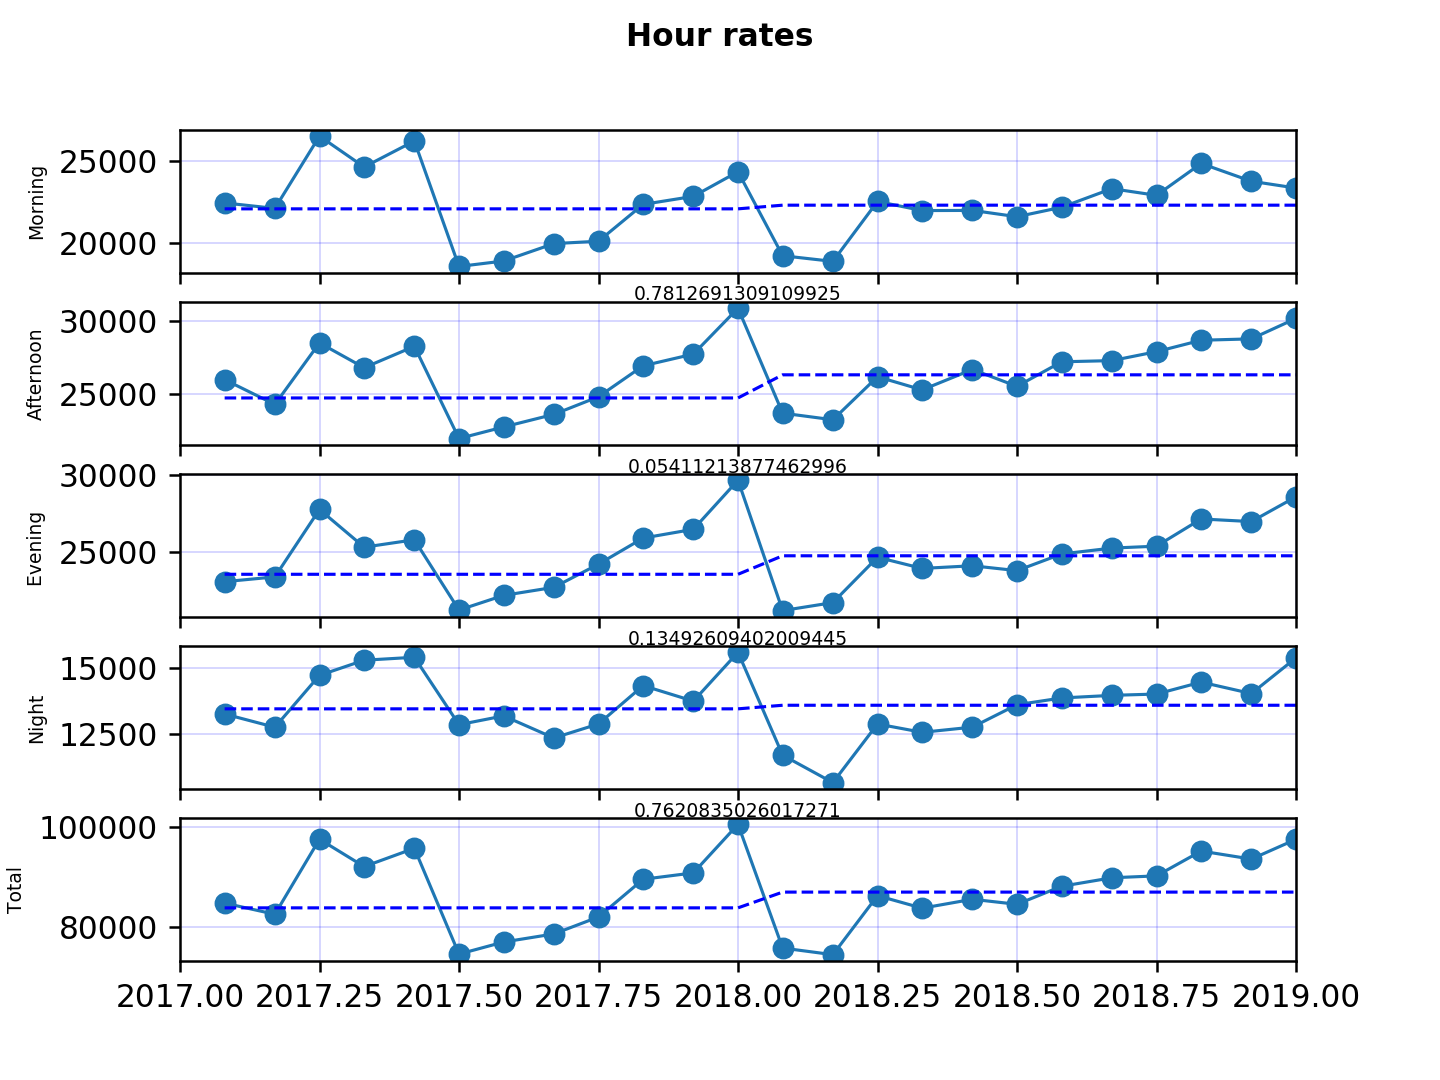

In [44]:
# Plot
fig, (ax1,ax3,ax4,ax5,ax6) = plt.subplots(5, sharex=True)
fig.suptitle("Hour rates", fontsize=10, fontweight="bold")

ax1.set_xlim(2017, 2019)
ax1.plot(yrmonth, morning_rate, linewidth=1, marker="o")
ax1.plot(yrmonth, m_fit, "b--", linewidth=1)
ax1.set_ylabel("Morning",fontsize=6)
ax1.set_xlabel( m_p,fontsize=6)
ax1.grid(color='b', linestyle='-', linewidth=0.1)

#ax2.plot(yrmonth, noon_rate, linewidth=1, marker="o")
#ax2.plot(yrmonth, n_fit, "b--", linewidth=1)
#ax2.set_ylabel("Noon Rate",fontsize=6)

ax3.plot(yrmonth, afternoon_rate, linewidth=1, marker="o")
ax3.plot(yrmonth, a_fit, "b--", linewidth=1)
ax3.set_ylabel("Afternoon",fontsize=6)
ax3.set_xlabel(a_p,fontsize=6)
ax3.grid(color='b', linestyle='-', linewidth=0.1)

ax4.plot(yrmonth, evening_rate, linewidth=1, marker="o")
ax4.plot(yrmonth, e_fit, "b--", linewidth=1)
ax4.set_ylabel("Evening ",fontsize=6)
ax4.set_xlabel(e_p,fontsize=6)
ax4.grid(color='b', linestyle='-', linewidth=0.1)

ax5.plot(yrmonth, night_rate, linewidth=1, marker="o")
ax5.plot(yrmonth, nt_fit, "b--", linewidth=1)
ax5.set_ylabel("Night",fontsize=6)
ax5.set_xlabel(nt_p,fontsize=6)
ax5.grid(color='b', linestyle='-', linewidth=0.1)


ax6.plot(yrmonth, total_rate, linewidth=1, marker="o")
ax6.plot(yrmonth, t_fit, "b--", linewidth=1)
ax6.set_ylabel("Total",fontsize=6)

ax6.grid(color='b', linestyle='-', linewidth=0.1)
plt.savefig("Regression_2019.png")

In [83]:
# Print results and save image
year = 2019
print("The morning count in 2019 will be " +
      str(m_slope * year + m_int) + ".")

print("The afternoon count in 2019 will be " +
      str(a_slope * year + a_int) + ".")
print("The evening count in 2019 will be " + str(e_slope * year + e_int) + ".")
print("The night count in 2019 will be " + str(nt_slope * year + nt_int) + ".")
print("The total count in 2019 will be " + str(t_slope * year + t_int) + ".")

#plt.savefig("../Images/18-final-plot.png")

The morning count in 2019 will be 22532.895987852593.
The afternoon count in 2019 will be 27903.43025254272.
The evening count in 2019 will be 25985.051100858487.
The night count in 2019 will be 13716.751122133079.
The total count in 2019 will be 90138.12846338749.
